In [22]:
import os
import librosa   #for audio processing
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get clone for achieving dataset
!git clone https://github.com/ym769/AudioProcessing.git

fatal: destination path 'AudioProcessing' already exists and is not an empty directory.


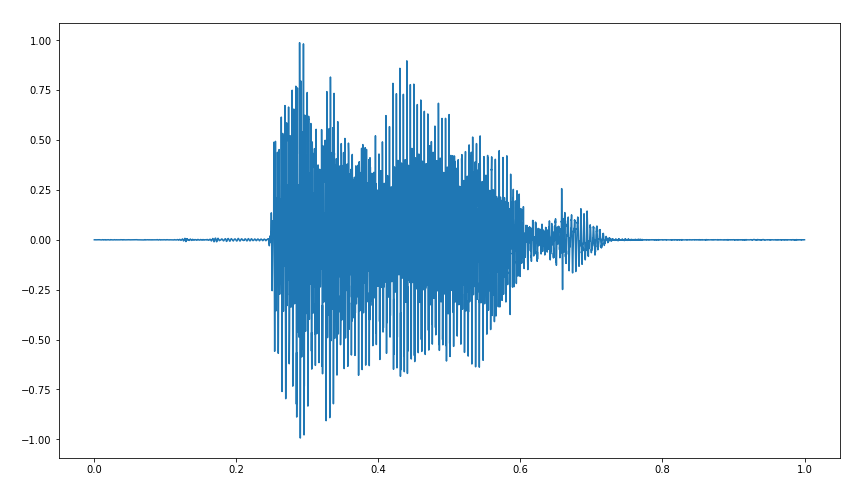

In [3]:
# plotting a sound sample of "bird" (Time domain)
train_audio_path = 'AudioProcessing/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'bird/01bcfc0c_nohash_0.wav', sr=16000) # sample rate = sr
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Raw wave of ' + 'train/audio/bird/01bcfc0c_nohash_0.wav',color="white")
ax1.set_xlabel('time',color="white")
ax1.set_ylabel('Amplitude',color="white")
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

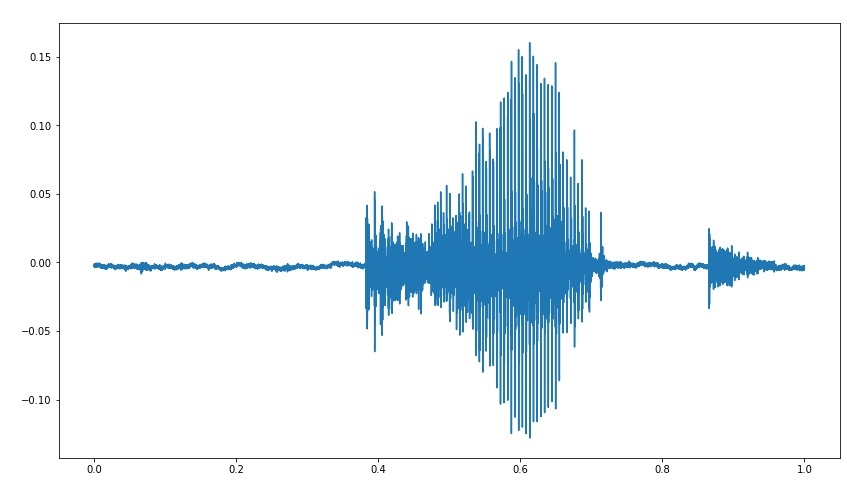

In [4]:
# plotting a sound sample of "cat" (Time domain)
train_audio_path = 'AudioProcessing/train/audio/'
samples, sample_rate = librosa.load(train_audio_path+'cat/004ae714_nohash_0.wav', sr=16000) # sample rate = sr
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(111)
ax1.set_title('Raw wave of ' + '00b01445_nohash_0.wav',color="white")
ax1.set_xlabel('time',color="white")
ax1.set_ylabel('Amplitude',color="white")
ax1.plot(np.linspace(0, sample_rate/len(samples), sample_rate), samples)

In [5]:
# 上で取得した "cat" (004ae714_nohash_0.wav) のsample, which have gotten as an array with 16000 numbers.
print(samples)
len(samples)

[-0.00314331 -0.00311279 -0.00100708 ... -0.0022583  -0.00411987
 -0.00500488]


16000

In [6]:
samples = librosa.resample(samples, sample_rate, 8000) # resample
print(samples)
len(samples)

[-0.00242816 -0.00173761 -0.00195774 ... -0.00414765 -0.00285007
 -0.00390239]


8000

In [7]:
# Now we correct all samples from directry "train/audio"
# it takes time.
train_audio_path = 'AudioProcessing/train/audio/'
labels = ["bird","cat"]

all_wave = [] # list for sampling arrays
all_label = [] # list for their each labels
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')] # list of wavfiles
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000) # open wavfile
        if (len(samples)== 8000) : 
            all_wave.append(samples)
            all_label.append(label)

In [8]:
print(all_label[:5]) # all_labelには正解ラベルが格納されている
print(all_wave[:5])

['bird', 'bird', 'bird', 'bird', 'bird']
[array([-0.00040503, -0.0007674 ,  0.00130111, ...,  0.00097085,
        0.00215022,  0.00267708], dtype=float32), array([-0.00051257, -0.00078479, -0.00046139, ...,  0.00058999,
        0.0006952 ,  0.00106383], dtype=float32), array([0.00047371, 0.00221263, 0.00288776, ..., 0.00159165, 0.00069333,
       0.00116285], dtype=float32), array([0.00080055, 0.00052075, 0.00013375, ..., 0.00620839, 0.00555267,
       0.004595  ], dtype=float32), array([-0.00408154, -0.00622278, -0.00599   , ..., -0.00684918,
       -0.00590518, -0.00744185], dtype=float32)]


In [9]:
# Convert the output labels to integer encoded: 1 for "cat" and 0 for "bird"
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
# convert the integer labels to a one-hot vector since it is a multi-classification problem:
from keras.utils import np_utils
y=np_utils.to_categorical(y, num_classes=len(labels))

Using TensorFlow backend.


In [11]:
print(y[0]) # label for the first sampling array
print(y[300]) # label for the 299th sampling array

[1. 0.]
[0. 1.]


In [12]:
# conv1dへの入力は3D配列でなければならないため、2D配列を3Dに再形成します
all_wave = np.array(all_wave).reshape(-1,8000,1)

In [13]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,shuffle=True)

In [14]:
print(y_tr[:3])
x_tr[:3]

[[1. 0.]
 [1. 0.]
 [0. 1.]]


array([[[-0.00035364],
        [-0.00055412],
        [-0.00034933],
        ...,
        [ 0.00084659],
        [ 0.00057137],
        [ 0.00068256]],

       [[ 0.00015182],
        [ 0.00034765],
        [ 0.00030988],
        ...,
        [-0.00033635],
        [-0.00019048],
        [-0.00021048]],

       [[-0.00371646],
        [-0.01545956],
        [-0.01539198],
        ...,
        [-0.00232086],
        [ 0.01087956],
        [ 0.0017503 ]]], dtype=float32)

In [15]:
print(y_val[:3])
x_val[:3]

[[0. 1.]
 [1. 0.]
 [0. 1.]]


array([[[ 4.9724650e-07],
        [-1.9811745e-05],
        [-6.3820553e-05],
        ...,
        [ 1.6232210e-05],
        [ 1.5181921e-04],
        [ 1.1080066e-04]],

       [[ 4.1427296e-03],
        [-1.9473104e-02],
        [-7.5573444e-02],
        ...,
        [-3.6946307e-03],
        [-3.8341084e-03],
        [-4.1945968e-03]],

       [[ 6.7268888e-04],
        [-5.4251211e-04],
        [-3.4792328e-04],
        ...,
        [ 2.3585954e-03],
        [ 2.2658317e-03],
        [ 1.8024279e-03]]], dtype=float32)

In [16]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs) # 
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Flatten layer
conv = Flatten()(conv)

#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8000, 1)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7988, 8)           112       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 2662, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2662, 8)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2652, 16)          1424      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 884, 16)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 884, 16)           0   

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) # loss function, opnimizer, metricsを定義

In [18]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
mc = ModelCheckpoint('best_model.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [19]:
history=model.fit(x_tr, y_tr ,epochs=10, callbacks=[es,mc], batch_size=32, validation_data=(x_val,y_val))

Train on 277 samples, validate on 70 samples
Epoch 1/10
277/277 [==============================] - 2s 7ms/step - loss: 0.7081 - accuracy: 0.5199 - val_loss: 0.6664 - val_accuracy: 0.6714
Epoch 2/10
277/277 [==============================] - 2s 6ms/step - loss: 0.6100 - accuracy: 0.6498 - val_loss: 0.6433 - val_accuracy: 0.6143
Epoch 3/10
277/277 [==============================] - 2s 6ms/step - loss: 0.5619 - accuracy: 0.7184 - val_loss: 0.5957 - val_accuracy: 0.6571
Epoch 4/10
277/277 [==============================] - 2s 6ms/step - loss: 0.4820 - accuracy: 0.8231 - val_loss: 0.5229 - val_accuracy: 0.7429
Epoch 5/10
277/277 [==============================] - 2s 6ms/step - loss: 0.3861 - accuracy: 0.8700 - val_loss: 0.4155 - val_accuracy: 0.8286
Epoch 6/10
277/277 [==============================] - 2s 6ms/step - loss: 0.2947 - accuracy: 0.8881 - val_loss: 0.3456 - val_accuracy: 0.8571
Epoch 7/10
277/277 [==============================] - 2s 6ms/step - loss: 0.2998 - accuracy: 0.8664 - v

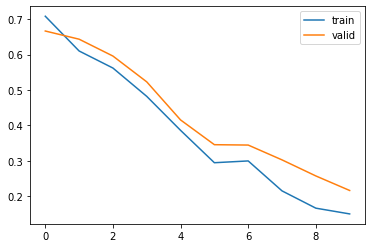

In [21]:
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='valid') 
pyplot.legend() 
pyplot.show()

In [23]:
def predict(audio):
    prob=model.predict(audio.reshape(1,8000,1))
    index=np.argmax(prob[0])
    return classes[index]

In [24]:
import random
index=random.randint(0,len(x_val)-1)
samples=x_val[index].ravel()
print("Audio:",classes[np.argmax(y_val[index])])
print("Text:",predict(samples))

Audio: bird
Text: bird
